# **i. Perkenalan**

Graded Challenge 5

Nama : Rivaldi Valensia

Batch : HCK-007

Link Huggingface : https://huggingface.co/spaces/Rivaldi/default_payment

Conceptual Problems :

1. Koefisien regresi adalah besarnya perubahan nilai variabel dependent. Semakin besar nilai koefisien, maka kontribusi perubahannya semakin besar. Dan semakin kecil nilai koefisien, maka kontribusi perubahannya akan semakin kecil.
2. Kernel pada SVM adalah alat yang membantu SVM memahami serta memisahkan data dengan baik. Salah satu kernel pada SVM adalah Polynomial Kernel yaitu salah satu jenis kernel yang digunakan untuk memproyeksikan data ke dalam dimensi yang lebih tinggi agar lebih mudah dipisahkan secara non-linear.
3. Cara memilih K yang optimal pada KNN adalah dengan menggunakan teknik cross-validation untuk mengoptimasi hyperparameter mana yang paling optimal untuk dibuat menjadi model nantinya.
4. 
- Accuracy adalah berapa persen model memprediksi data dengan benar. Accuracy digunakan ketika ingin mengukur sejauh mana model melakukan prediksi yang benar secara keseluruhan. 
- Precision merupakan metriks yang digunakan untuk mengukur seberapa akurat sistem dalam mengidentifikasi data yang relevan. Waktu yang tepat untuk menggunakan precision adalah ketika ingin mengukur sejauh mana model dapat meminimalisir kesalahan False Positive (FP).
- Recall merupakan metriks yang digunakan untuk mengukur seberapa banyak data relevan yang berhasil diidentifikasi oleh sistem. Waktu yang tepat untuk menggunakan recall adalah ketika ingin mengukur sejauh mana model dapat meminimalisir kesalahan pada False Negative (FN)
- F1 Score merupakan ukuran keseluruhan sejauh mana model  dapat mengidentifikasi dengan benar kelas True Positive (TP), sambil mempertimbangkan kedua jenis kesalahan, yaitu False Positive (FP) dan False Negative (FN).


# **ii. SQL Query**

Bagian ini untuk menulis query yang telah dibuat dari Google Cloud Platform.

```sql
SELECT
    limit_balance,
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 13986;
```

# **iii. Import Libraries**

Bagian ini untuk mengimport library yang akan digunakan

In [1]:
# Data Exploration
import pandas as pd

#Data Calculation
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer

# Imbalance Handling
from imblearn.over_sampling import SMOTENC

# Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

#Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV

#Model Saving
import pickle

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


# **iv. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

In [2]:
# Import CSV
data_raw = pd.read_csv('data_raw.csv')

# Show result
data_raw

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Dataset yang telah diubah menjadi csv lalu di import menggunakan library pandas dan dijadikan suatu dataframe berbentuk tabel

# **v. Exploratory Data Analysis (EDA)**

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## A. Problem Overview

Problem Definition : Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

Objectives : 
- Mampu memperoleh data menggunakan BigQuery.
- Mampu memahami konsep Classification dengan Logistic Regression, SVM, dan KNN.
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression, SVM, dan KNN.
- Mampu mengimplementasikan Logistic Regression, SVM, dan KNN untuk membuat prediksi.

## B. Data Understanding

Langkah ini dilakukan guna memahami data dan pengecekan pola yang ada pada dataframe seperti pengecekan nama dan jumlah kolom, pengecekan missing value, pengecekan data duplikat dan lain-lain

In [3]:
# Show top 5 data of dataset
data_raw.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


Menampilkan 5 data teratas sesuai index dari dataframe

In [4]:
#Show basic information
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Menampilkan informasi dasar mengenai dataframe seperti nama kolom, tipe data dan lain-lain

In [5]:
# Show shape of dataframe
data_raw.shape

(2965, 24)

Menampilkan ukuran tabel yang mempunyai 2965 baris dan 24 kolom

In [6]:
# Show name of all columns
data_raw.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Menampilkan nama kolom secara keseluruhan

**Keterangan nama kolom pada dataframe:**

| Nama Kolom                  | Keterangan                                                                   |
| --------------------------- | ---------------------------------------------------------------------------- |
| limit_balance | Jumlah kredit yang diberikan kepada nasabah.|
| sex | Jenis kelamin nasabah |
| education_level | Tingkat pendidikan nasabah |
| marital_status | Status perkawinan nasabah |
| age | Usia nasabah |
| pay_0 | Status pembayaran bulan ke-0
| pay_2 | Status pembayaran bulan ke-2
| pay_3 | Status pembayaran bulan ke-3
| pay_4 | Status pembayaran bulan ke-4
| pay_5 | Status pembayaran bulan ke-5
| pay_6 | Status pembayaran bulan ke-6
| bill_amt_1 | Jumlah tagihan kredit nasabah pada bulan ke-1
| bill_amt_2 | Jumlah tagihan kredit nasabah pada bulan ke-2
| bill_amt_3 | Jumlah tagihan kredit nasabah pada bulan ke-3
| bill_amt_4 | Jumlah tagihan kredit nasabah pada bulan ke-4
| bill_amt_5 | Jumlah tagihan kredit nasabah pada bulan ke-5
| bill_amt_6 | Jumlah tagihan kredit nasabah pada bulan ke-6
| pay_amt_1 | Jumlah pembayaran yang dibayarkan oleh nasabah pada bulan ke-1
| pay_amt_2 | Jumlah pembayaran yang dibayarkan oleh nasabah pada bulan ke-2
| pay_amt_3 | Jumlah pembayaran yang dibayarkan oleh nasabah pada bulan ke-3
| pay_amt_4 | Jumlah pembayaran yang dibayarkan oleh nasabah pada bulan ke-4
| pay_amt_5 | Jumlah pembayaran yang dibayarkan oleh nasabah pada bulan ke-5
| pay_amt_6 | Jumlah pembayaran yang dibayarkan oleh nasabah pada bulan ke-6
| default_payment_next_month | Variabel target yang menunjukkan apakah nasabah akan gagal membayar tagihan kredit pada bulan berikutnya

In [7]:
# # Selects numeric columns
numeric = data_raw.select_dtypes(include=['int64', 'float64']).columns

# Selects categorical columns
object = data_raw.select_dtypes(include=['object']).columns

Membagi dataframe berdasarkan tipe data pada kolomnya nya yaitu numerical dan categorical

In [8]:
# Define variable
num = numeric.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data numerikal adalah :", num, "kolom", "\n","\n", numeric)

Jumlah kolom yang bertipe data numerikal adalah : 24 kolom 
 
 Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data numerical

In [9]:
# Define variable
obj = object.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data object adalah :",obj, "kolom", "\n","\n",object)

Jumlah kolom yang bertipe data object adalah : 0 kolom 
 
 Index([], dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data categorical.

Seluruh data berupa tipe data numeric. Karena tidak ada kolom yang bertipe object

In [10]:
# Check duplicate rows
data_raw.duplicated().sum()

1

Mengecek jumlah baris yang duplikat pada dataframe. Ditemukan bahwa ada baris yang terduplikasi yang nantinya akan di handling

In [11]:
# Check missing value
data_raw.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Tidak ada missing value di kolom apapun

In [12]:
# Showing descriptive statistics for numeric columns
data_raw[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Mengecek ringkasan statistik seperti nilai rata-rata, nilai minimum dan maksimum pada data yang bertipe numerical

In [13]:
# Returns the number of unique values ​​in each column of data_raw
data_raw.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

Menampilkan jumlah unik value yang ada di setiap kolom.

 Kolom sex, marital_status, sex, education_level, pay_0 sampai pay_6 serta default_payment_next_month mempunyai sedikit unique values, hal ini menandakan bahwa kolom-kolom tersebut bertipe categorical atau bukan continues values.

## C. Data Cleaning

Pada langkah ini akan dilakukan pembersihan data, guna menyiapkan data agar dapat digunakan untuk membuat model klasifikasi. Langkah yang akan dilakukan pada data cleaning menghapus duplikasi data, pengubahan nama kolom dan lain-lain.


### 1. Drop duplicated

In [14]:
# Removing duplicates based on all columns
data_raw = data_raw.drop_duplicates()

Melakukan pembersihan data duplikat

In [15]:
# Check duplicate rows
data_raw.duplicated().sum()

0

Dataframe sudah bersih dari data duplikat

### 2. Rename column

In [16]:
# Rename column
data_raw.rename({'pay_0': 'pay_1'}, axis=1, inplace=True)

Mengubah kolom pay_0 menjadi pay_1, karena pada list kolom tidak ada pay_1, jadi ada kemungkinan bahwa pay_0 adalah pay_1

In [17]:
# Checks if column B still exists
if 'pay_0' in data_raw.columns:
    print("Nama kolom pay_0 belum berubah pada dataframe.")
else:
    print("Nama kolom pay_0 sudah berubah pada dataframe.")

Nama kolom pay_0 sudah berubah pada dataframe.


Mengecek apakah nama kolom pay_0 sudah berubah menjadi pay_1

### 3. Dataframe after data cleaning

In [18]:
# Define variable for new dataframe
data_clean = data_raw
data_clean

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Membuat dataframe baru yaitu data_clean untuk menyimpan data yang telah sudah dicleaning sebelumnya

## D. Data Visualization

### PLOT 1

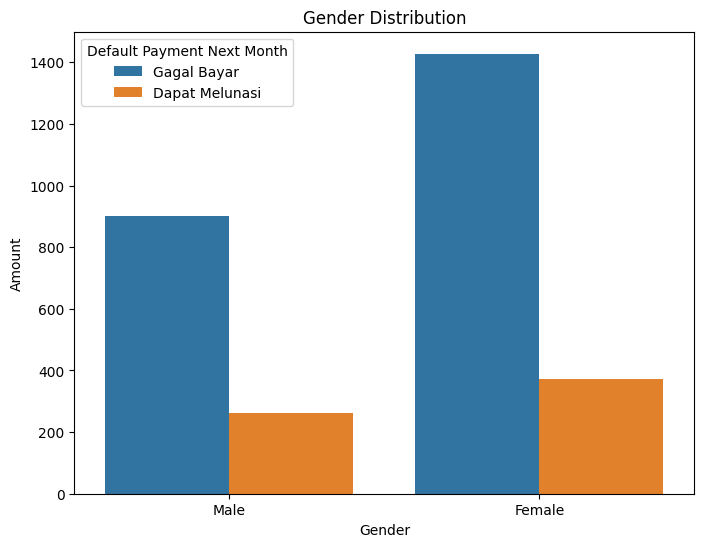

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='default_payment_next_month', data=data_clean)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.legend(title='Default Payment Next Month', labels=['Gagal Bayar', 'Bisa Bayar'])
# Mengganti label pada sumbu x
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

Terlihat bahwa gender perempuan lebih banyak yang gagal bayar dibandingkan dengan laki-laki. Namun, kemampuan bayar pada gender perempuan tetap lebih tinggi dibandingkan laki-laki. Ini berarti gender perempuan merupakan gender mayoritas yang ada di data nasabah


### PLOT 2

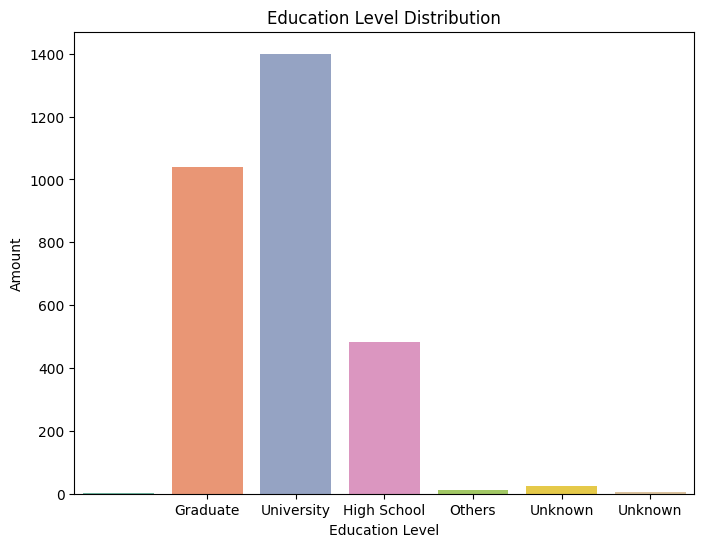

In [90]:
# Plot 2
plt.figure(figsize=(8, 6))
sns.countplot(x='education_level', data=data_clean, palette='Set2')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Amount')
plt.xticks([1, 2, 3, 4, 5, 6],
           ['Graduate', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])
plt.show()

Terlihat bahwa pada kelas University pada Education Level merupakan kelas nasabah yang paling banyak terlibat kasus gagal bayar.


### PLOT 3

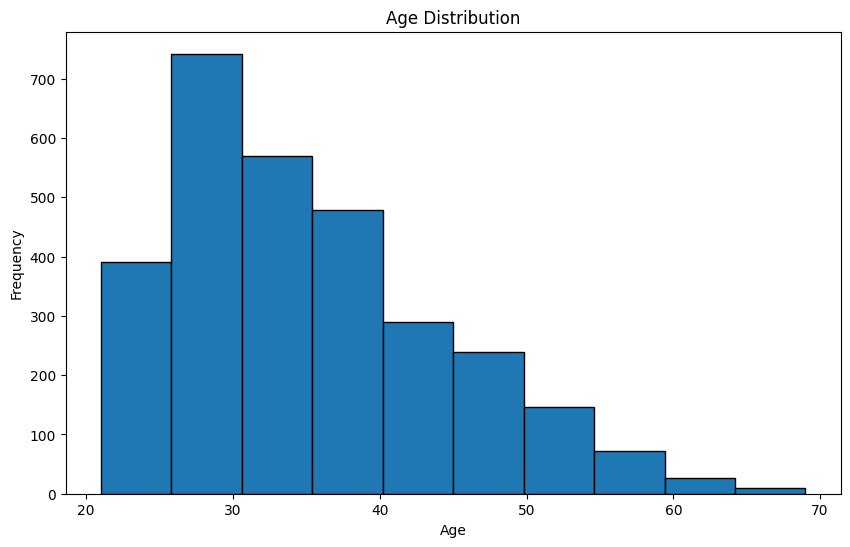

In [87]:
# Plot 3
plt.figure(figsize=(10, 6))
plt.hist(data_clean['age'], edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Terlihat bahwa usia sekitar umur 25-30 merupakan usia mayoritas nasabah yang mengalami kasus gagal bayar


### PLOT 4

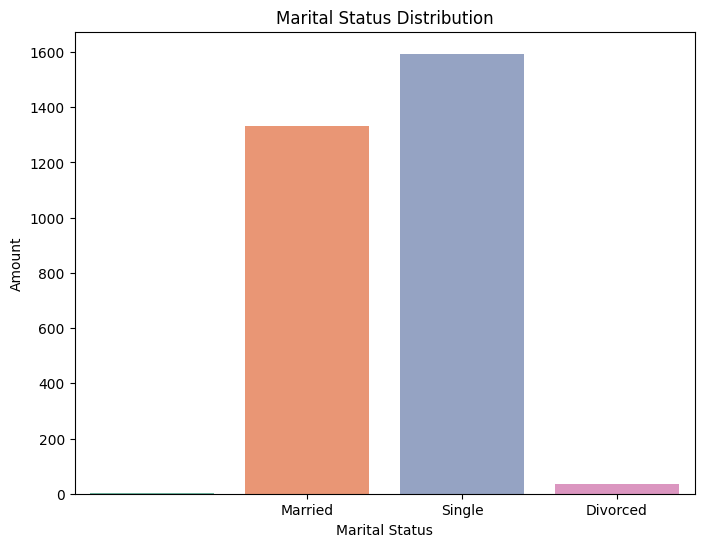

In [88]:
# Plot 4
plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='marital_status', palette='Set2')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.xticks([1, 2, 3], ['Married', 'Single', 'Divorced'])
plt.show()

Nasabah yang belum menikah merupakan nasabah yang banyak mengalami kasus gagal bayar


### PLOT 5

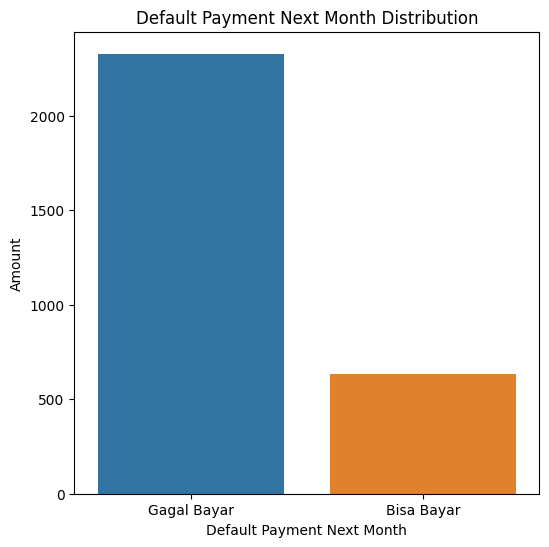

In [89]:
# Plot 5
plt.figure(figsize=(6, 6))
sns.countplot(data=data_clean, x='default_payment_next_month')
plt.title('Default Payment Next Month Distribution')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Gagal Bayar', 'Bisa Bayar'])
plt.show()

Kebanyakan nasabah gagal membayar cicilan berdasarkan data historis yang ada


# vi. **Feature Engineering**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## A. Divide data into categories values and numeric values

Langkah memisahkan data kategori dan data numerik agar dapat mengidentifikasi pola, tren, dan hubungan dalam data dengan lebih baik, yang selanjutnya akan membantu Anda membuat keputusan yang lebih baik dan membangun model yang lebih akurat. Memang, data dalam kolom bertipe integer, namun ada beberapa kolom yang memiliki unique values sedikit dan bisa dikatakan sebagai categories values

In [24]:
#Divide category columns into list_category_columns
list_category_columns = ['sex', 'education_level', 'marital_status','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Divide numeric columns into list_numeric_columns
list_numeric_columns = ['limit_balance', 'age', 'bill_amt_1','bill_amt_2','bill_amt_3',
                        'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 
                        'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']

Pemisahan data sudah selesai dilakukan dengan membuat variabel baru

## B. Cardinality

Langkah ini dilakukan untuk mengukur jumlah nilai unik pada masing-masing kolom yang bertipe categorical

In [25]:
# Loop through the columns in list_category_columns
for col in list_category_columns:
    cardinality = data_clean[col].nunique()
    print(f"Cardinality kolom {col}: {cardinality}")

Cardinality kolom sex: 2
Cardinality kolom education_level: 7
Cardinality kolom marital_status: 4
Cardinality kolom pay_1: 11
Cardinality kolom pay_2: 10
Cardinality kolom pay_3: 9
Cardinality kolom pay_4: 10
Cardinality kolom pay_5: 9
Cardinality kolom pay_6: 8


## C. Heatmap Correlation

Langkah ini dilakukan guna mencari hubungan korelasi antar kolom

Melakukan pembagian grup heatmap berdasarkan informasi yang ada didalam masing-masing, serta penjelasan grup tersebut

1. Profile = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan profil nasabah seperti usia, jenis kelamin, dan sebagainya.
2. Payment = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan pola pembayaran nasabah
3. Bill Amount = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan sejarah jumlah tagihan kredit bulanan nasabah
4. Pay Amount = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan sejarah jumlah pembayaran bulanan yang dibayarkan oleh nasabah

Serta melakukan looping untuk menampilkan heatmap tersebut secara berurutan

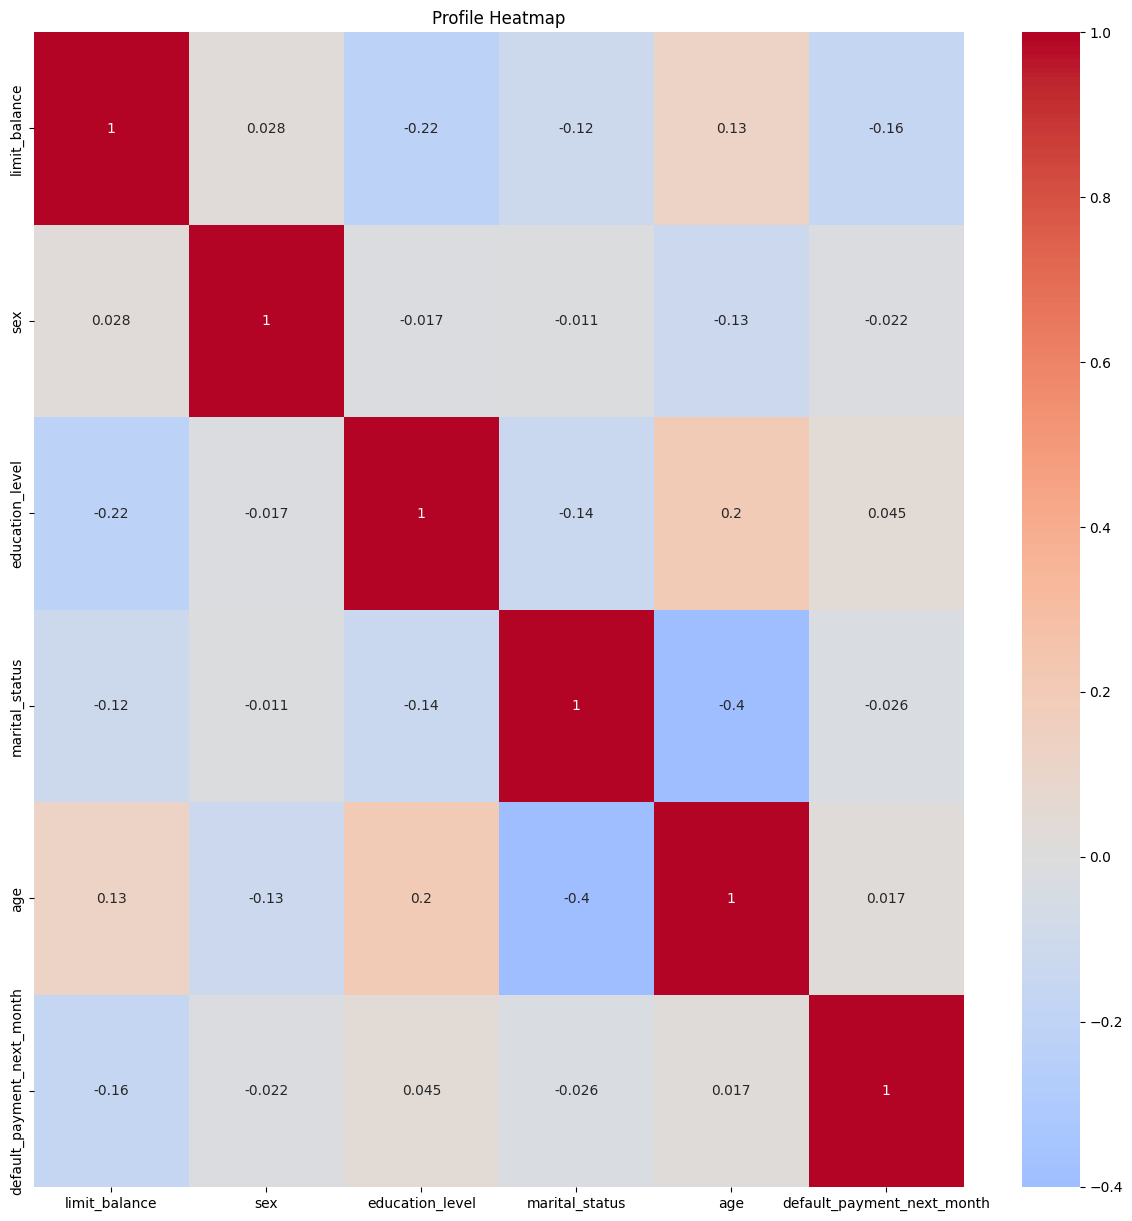

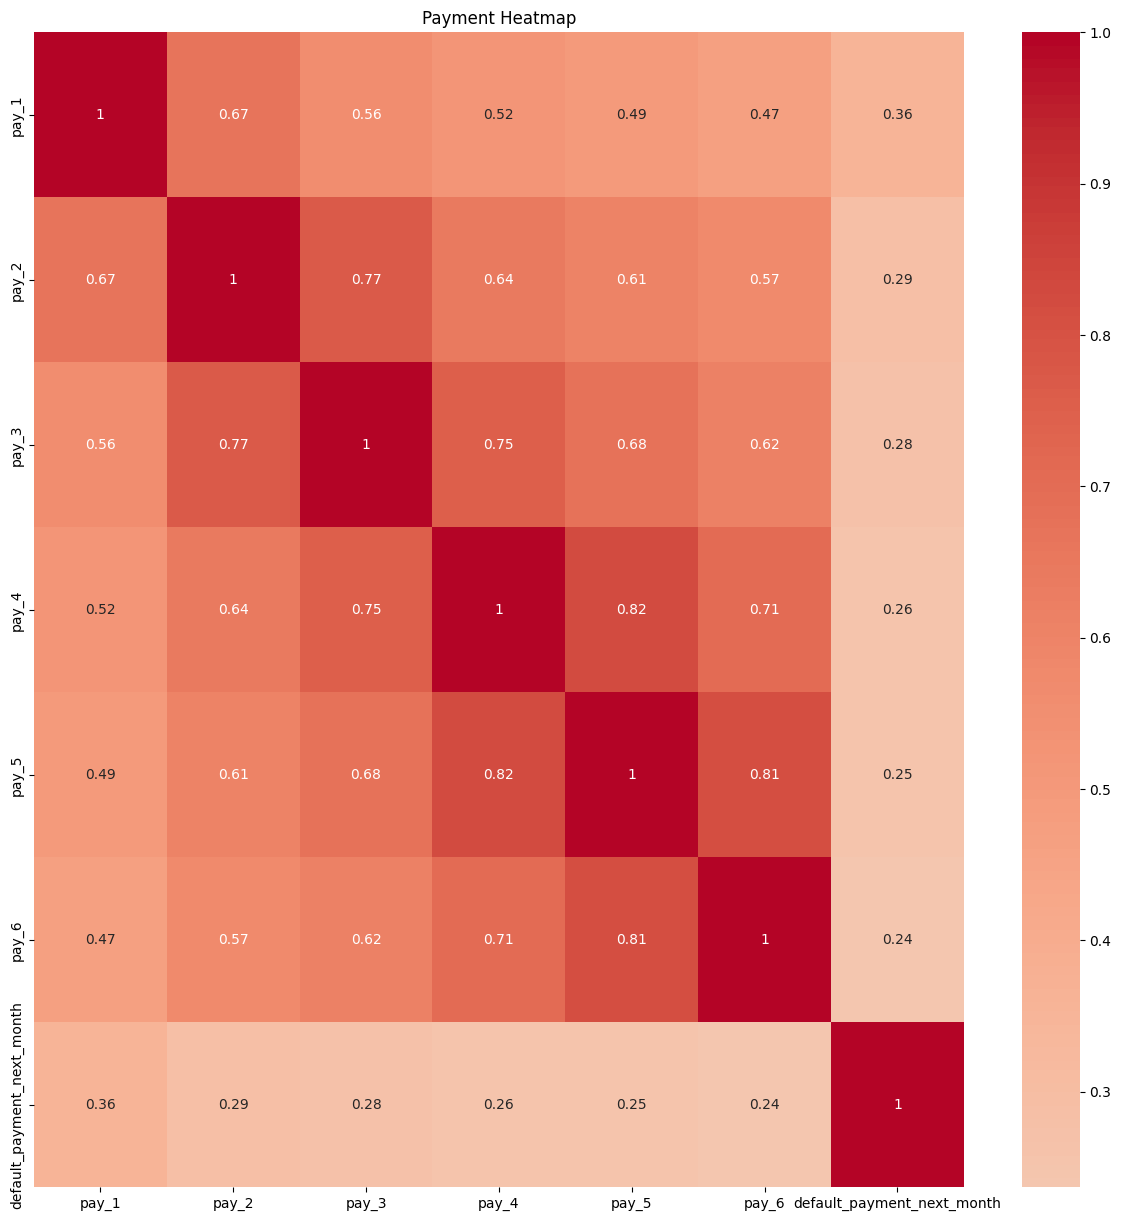

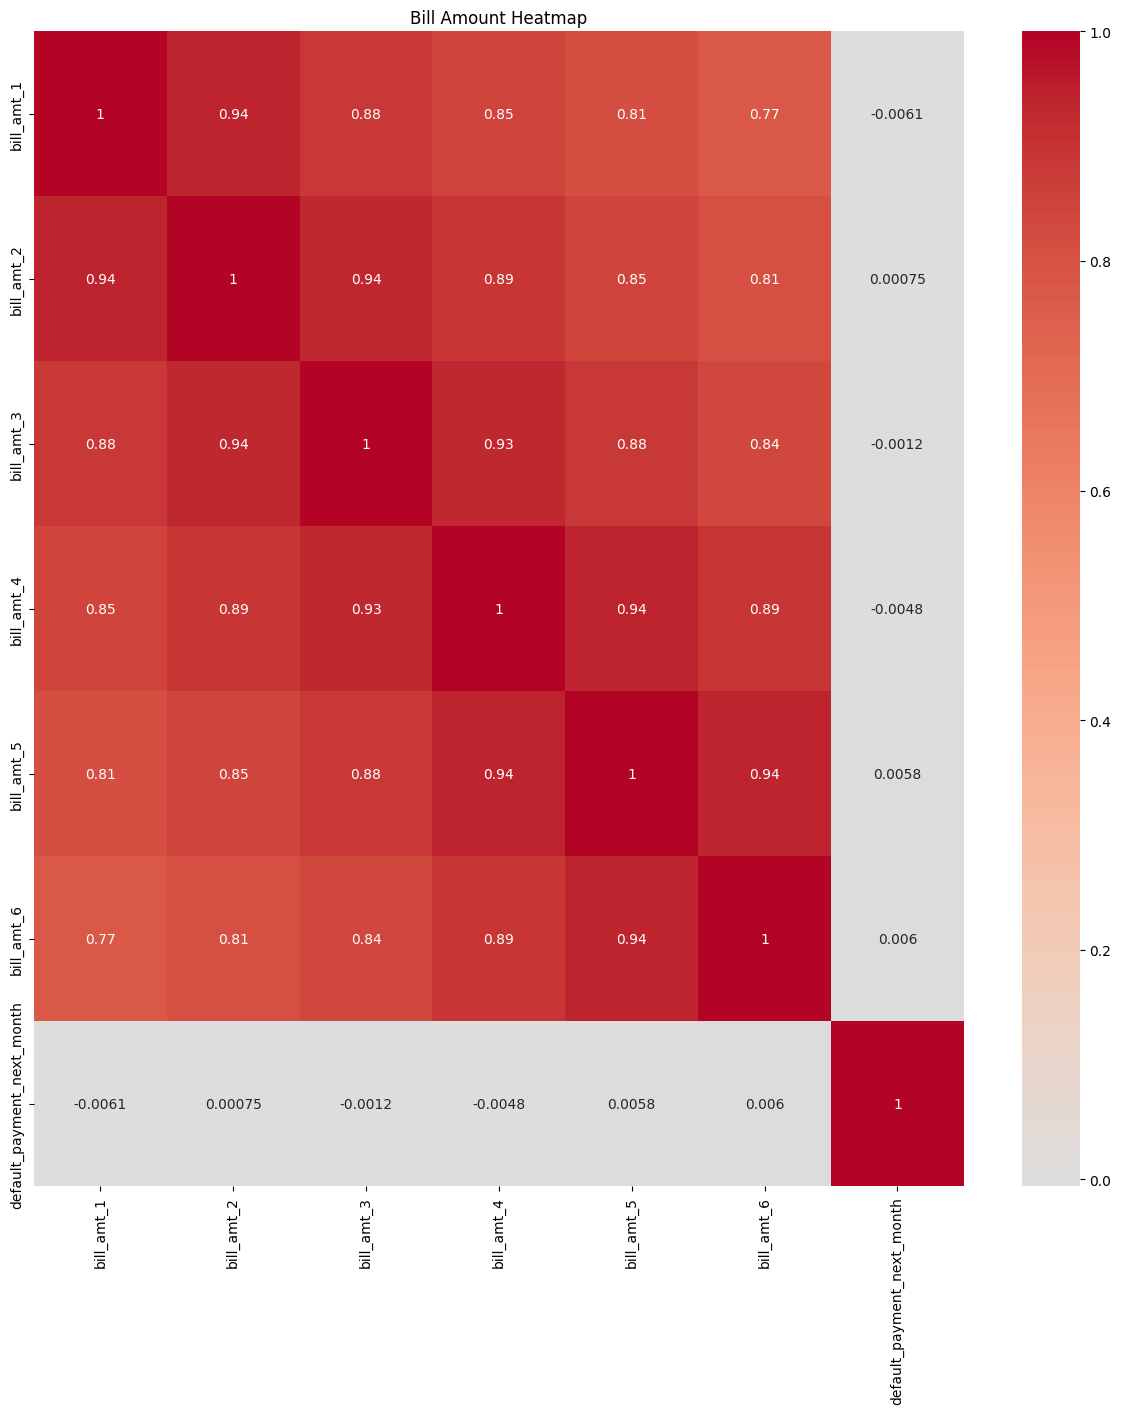

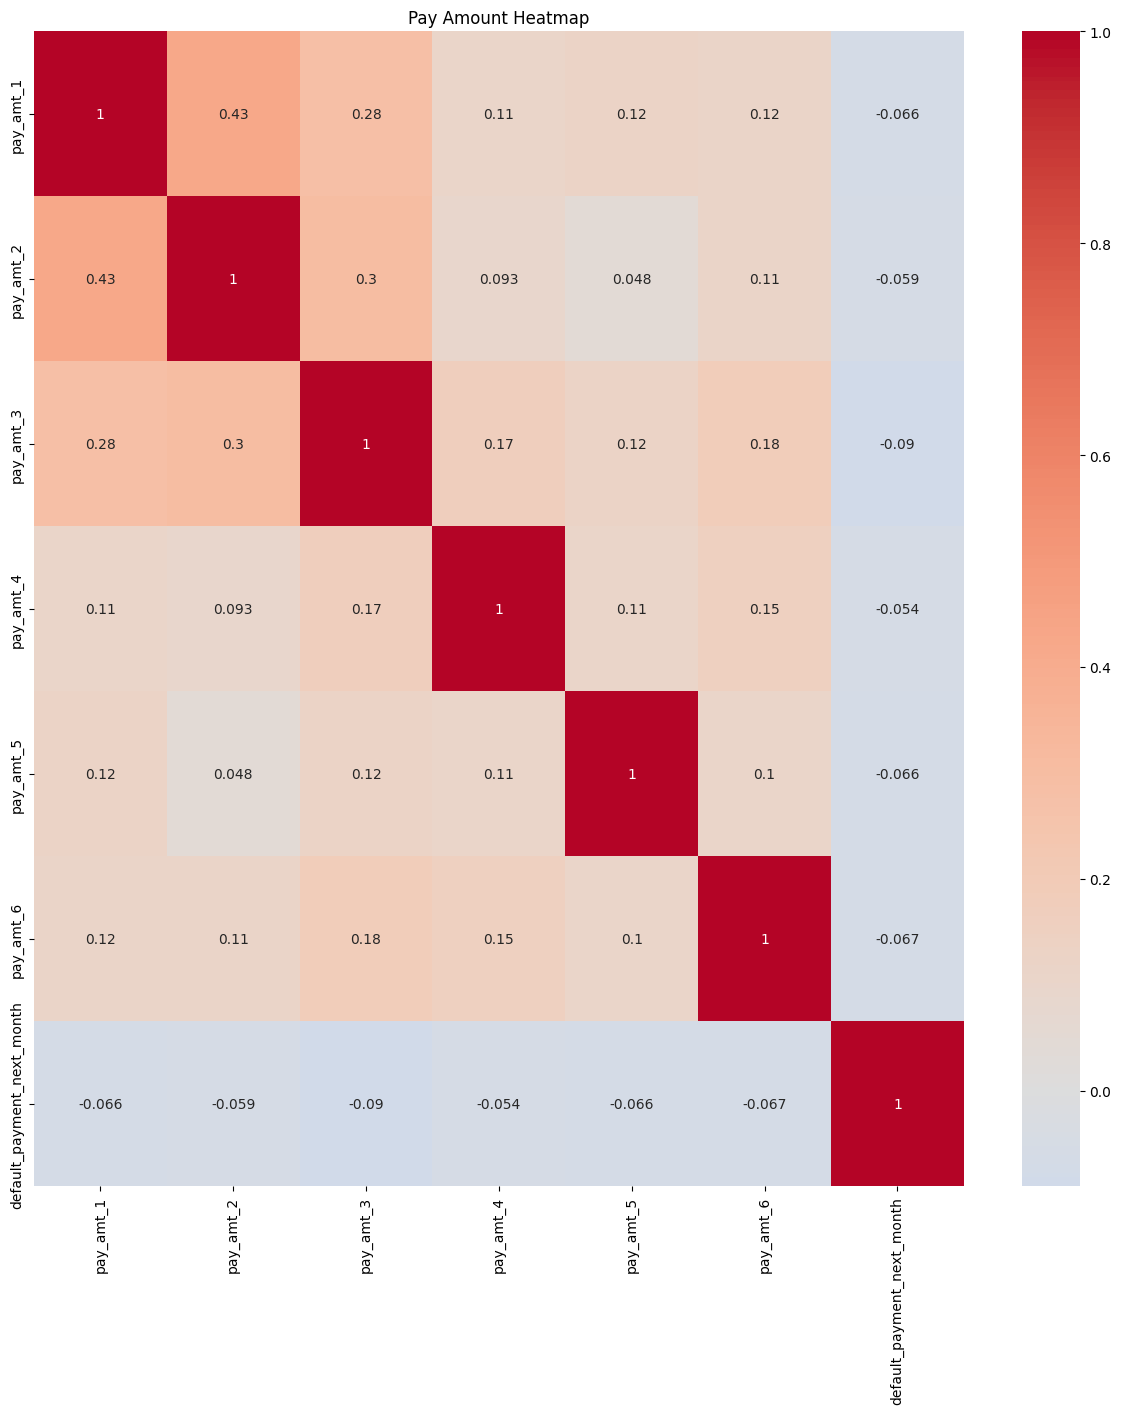

In [26]:
# Definition of columns for each heatmap group
heatmap = {
    'Profile': ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'default_payment_next_month'],
    'Payment': ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month'],
    'Bill Amount': ['bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'default_payment_next_month'],
    'Pay Amount':['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6', 'default_payment_next_month']
}

# Looping to create a heatmap for each group
for i, column in heatmap.items():
    i_heatmap = data_clean[column]
    corr_matrix = i_heatmap.corr()
    
# Create plot to show heatmap correlation
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{i} Heatmap')
    plt.show()

Kolom pay_1 sampai pay_6 adalah kolom yang memiliki korelasi dengan kolom default_payment_next_month lebih dari 0.1. Mayoritas kolom mempunyai korelasi dibawah 0.1 dengan kolom default_payment_next_month. Dengan heatmap ini saja kita dapat menyimpulkan bahwa kolom pay_1 sampai pay_6 merupakan kolom yang bisa menjadi feature dalam pemodelan klasifikasi.

## D. Feature Selection

Langkah ini merupakan proses seleksi kolom feature mana saja yang memiliki korelasi tertinggi ataupun penting terhadap kolom target.

Langkah ini merupakan proses seleksi kolom dan mengambil kolom yang memiliki korelasi diatas threshold yang ditentukan saja.

### 1. Column Selection

In [27]:
#Calculates the correlation matrix between numeric features in data_clean
correlation_matrix = data_clean.corr()

#Take the correlation series between 'price' and other numeric features
correlation = correlation_matrix['default_payment_next_month']

# Select only those features with a correlation of more than 0.1 to 'price'
selected_corr = correlation[(correlation >= 0.1) | (correlation <= -0.1)].index.tolist()

# Create a new Dataframe containing only selected features
feature = data_clean[selected_corr]

# Show dataframe
feature

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,150000.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2960,80000.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,50000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,450000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,50000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


Saya memilih threshold >=0.1 atau <= -0.1, karena mayoritas kolom mempunyai korelasi 0.0, setelah membuat threshold maka kita mendapatkan 7 kolom feature dan 1 kolom target yaitu default_payment_next_month.


### 2. Divide Selected Feature

Langkah ini dilakukan untuk memisahkan feature categorical dan feature numerical agar memudahkan dalam pemanggilan variabel.

In [28]:
# Divide numeric features 
feature_num = feature[['limit_balance', 'default_payment_next_month']]

# Divide category features 
feature_cat = feature[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

Membagi menjadi 2 dataframe yaitu feature_num dan feature_cat.

In [29]:
# Show dataframe of numeric features
feature_num

,limit_balance,default_payment_next_month
0,80000.0,1
1,200000.0,0
2,20000.0,1
3,260000.0,0
4,150000.0,0
...,...,...
2960,80000.0,0
2961,50000.0,1
2962,450000.0,1
2963,50000.0,0


Menampilkan dataframe dari numerical features

In [30]:
# Show dataframe of category features
feature_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...
2960,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0
2961,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
2962,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2963,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


Menampilkan dataframe dari category features

## E. Split Data

Tujuan utama dari pemisahan data adalah menghindari overfitting, di mana model belajar menghafal data pelatihan dan gagal bekerja dengan baik pada data baru.

In [31]:
# Divide features and target
X = feature.drop('default_payment_next_month', axis=1)
y = feature['default_payment_next_month']

Memisahkan feature dan target. Variabel feature adalah dataframe akhir yang dibuat setelah proses feature selection. X berisi semua kolom kecuali default_payment_next_month, sedangkan y adalah kolom default_payment_next_month saja


In [32]:
# Divide data into data training and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49, stratify=y)

# Show result
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2371, 7)
(593, 7)
(2371,)
(593,)


Membagi data menjadi dua jenis, yaitu data train dan data test. Data uji berisi 20% dari total keseluruhan data pada dataframe feature. Data test berisi feature dan target (X dan y)

In [33]:
# Show dataframe of X_train
X_train

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
497,50000.0,0.0,0.0,0.0,0.0,0.0,0.0
2928,200000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
1310,20000.0,1.0,2.0,0.0,0.0,0.0,0.0
284,230000.0,0.0,0.0,0.0,0.0,0.0,0.0
264,110000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
434,350000.0,0.0,0.0,0.0,0.0,0.0,0.0
2623,120000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
567,60000.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,50000.0,0.0,0.0,0.0,0.0,0.0,0.0


Terdapat 2371 baris dan 7 kolom untuk X_train

In [34]:
# Show dataframe of X_test
X_test

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
899,180000.0,0.0,0.0,0.0,0.0,0.0,0.0
2292,200000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
443,310000.0,0.0,0.0,0.0,0.0,0.0,0.0
2618,80000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
2696,210000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
...,...,...,...,...,...,...,...
1969,240000.0,1.0,2.0,-1.0,2.0,2.0,2.0
574,240000.0,0.0,0.0,0.0,0.0,0.0,0.0
41,30000.0,0.0,0.0,0.0,0.0,0.0,0.0
603,110000.0,0.0,0.0,0.0,0.0,0.0,0.0


Terdapat 593 baris dan 7 kolom untuk X_test

In [35]:
# Convert array y_train to dataframe
y_train = pd.DataFrame(y_train)

# Show result
y_train

,default_payment_next_month
497,0
2928,0
1310,0
284,0
264,0
...,...
434,0
2623,0
567,0
1140,0


Terdapat 2371 baris dan 1 kolom untuk y_train

In [36]:
# Convert array y_test to dataframe
y_test = pd.DataFrame(y_test)

# Show dataframe
y_test

,default_payment_next_month
899,0
2292,0
443,0
2618,0
2696,0
...,...
1969,1
574,0
41,0
603,0


Terdapat 593 baris dan 1 kolom untuk y_test

### 1. X_train_num & X_test_num

In [37]:
# Select numerical columns from X_train
X_train_num = X_train[['limit_balance']]

# Select numerical columns from X_test
X_test_num = X_test[['limit_balance']]

Membagi menjadi data train numerical dan data test numerical dan saya hanya memilih kolom limit_balance sebagai numeric column karena kolom lain bertipe categorical values atau memiliki unique values yang sedikit

In [38]:
# Show dataframe of X_train_num
X_train_num

,limit_balance
497,50000.0
2928,200000.0
1310,20000.0
284,230000.0
264,110000.0
...,...
434,350000.0
2623,120000.0
567,60000.0
1140,50000.0


Menampilkan dataframe X_train_num yang berjumlah 2371 baris dan 1 kolom

In [39]:
# Show dataframe of X_test_num
X_test_num

,limit_balance
899,180000.0
2292,200000.0
443,310000.0
2618,80000.0
2696,210000.0
...,...
1969,240000.0
574,240000.0
41,30000.0
603,110000.0


Menampilkan dataframe X_test_num yang berjumlah 593 baris dan 1 kolom

### 2. X_train_cat & X_test_cat

In [40]:
# Select categorical columns from X_train
X_train_cat = X_train[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

# Select numerical columns from X_test
X_test_cat = X_test[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

Membagi menjadi data train categorical dan data test categorical dan ada beberapa kolom bertipe categorical, yaitu pay_1 sampai dengan pay_6

In [41]:
# Show dataframe of X_train_cat
X_train_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
497,0.0,0.0,0.0,0.0,0.0,0.0
2928,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
1310,1.0,2.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.0,0.0,0.0
264,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
434,0.0,0.0,0.0,0.0,0.0,0.0
2623,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
567,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0


Menampilkan dataframe X_train_cat yang berjumlah 2371 baris dan 6 kolom

In [42]:
# Show dataframe of X_test_cat
X_test_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
899,0.0,0.0,0.0,0.0,0.0,0.0
2292,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
443,0.0,0.0,0.0,0.0,0.0,0.0
2618,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
2696,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
...,...,...,...,...,...,...
1969,1.0,2.0,-1.0,2.0,2.0,2.0
574,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0


Menampilkan dataframe X_test_cat yang berjumlah 593 baris dan 6 kolom

## F. EDA before modelling

Sama seperti EDA pada umumnya, pada langkah ini ditujukan lebih spesifik seperti mencari anomali data.

### 1. Feature

In [43]:
# Calculates the skewness of distance column in the feature DataFrame
feature_num['limit_balance'].skew()

1.0006047564306488

Berdasarkan syntax diatas hanya ada 1 kolom bertipe numerical yaitu limit_balance yang diuji skewness/kemiringan distribusi datanya dan terlihat bahwa skewness 1.0 yang menandakan adanya distribusi data ekstrem atau tidak normal

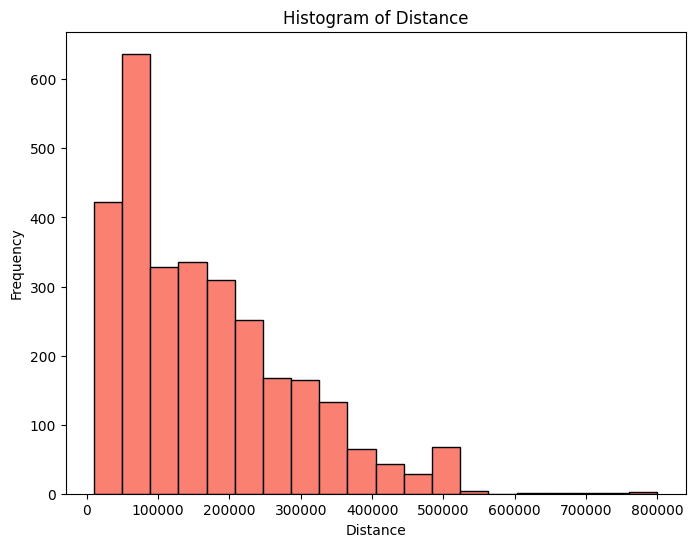

In [44]:
# Create histograms of distance plot
plt.figure(figsize=(8, 6))
plt.hist(feature_num['limit_balance'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

Terlihat dari visualisasi plot bahwa kemiringan data terjadi secara ekstrem atau tidak normal, maka dari itu kita perlu handling kemiringan tersebut nantinya sebelum pemodelan

## G. Handling Outlier

Langkah ini dilakukan agar distribusi data mendekati normal, dan bertujuan agar hasil pemodelan nantinya lebih akurat karena tidak adanya data yang anomali.

### 1. X_train_num

Membagi handling outlier menjadi 2, yaitu X_train_num dan X_test_num

#### i. Calculate lower boundary & upper boundary X_train_num

Batas bawah dan batas atas dapat membantu model mengukur toleransi terhadap outlier atau anomali data

In [45]:
# Check skewness for X_train_num
X_train_num.skew()

limit_balance    1.017216
dtype: float64

Kemiringan distribusi data dari variabel X_train_num diatas 1, maka dari itu perlu di handling.

In [46]:
# Calculates the first quartile (Q1) and third quartile (Q3) of X_train_num
Q1 = np.percentile(X_train_num, 25)
Q3 = np.percentile(X_train_num, 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Calculate lower and upper boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show result
print(f'Ambang batas bawah X_train_num adalah :', lower_bound)
print(f'Ambang batas atas X_train_num adalah :', upper_bound)

Ambang batas bawah X_train_num adalah : -220000.0
Ambang batas atas X_train_num adalah : 500000.0


Menghitung batas bawah yaitu -22.000 dan batas atas 55.000 dari variabel X_train_num

In [47]:
# Count amount of outlier
outlier_count = np.sum((X_train_num < lower_bound) | (X_train_num > upper_bound))

# Calculate the total data in a column
total_data = len(X_train_num)

# Show amount of outlier
print(f"Jumlah outlier dalam data X train adalah: {outlier_count[0]} outlier")


Jumlah outlier dalam data X train adalah: 11 outlier


Melakukan perhitungan ada berapa outlier pada X_train_num, ternyata ada 11 outlier pada variabel tersebut

#### ii. Capping Method X_train_num

Metode Capping (Capping Method) digunakan untuk mengatasi outlier dalam sebuah dataset dengan cara mengubah nilai-nilai outlier menjadi nilai-nilai yang lebih mendekati nilai-nilai batas atas (upper bound) atau batas bawah (lower bound) yang telah ditentukan sebelumnya.

In [48]:
# Apply the Winsorizer technique
capping_train = Winsorizer(capping_method='iqr', 
                         tail='both', fold=3, variables=['limit_balance'])

Saya menggunakan metode iqr dan fold 3 karena skewness yang cukup ekstrem yaitu 1.0. Serta saya menggunakan tail both agar outlier dicapping atau dimasukkan ke lower bound dan upper bound

In [49]:
# Apply the Winsorizer transformation to the data train
X_train_capped = capping_train.fit_transform(X_train_num)

# Show result
X_train_capped

,limit_balance
497,50000.0
2928,200000.0
1310,20000.0
284,230000.0
264,110000.0
...,...
434,350000.0
2623,120000.0
567,60000.0
1140,50000.0


Menampilkan dataframe X_train_capped yang merupakan X_train_num setelah dicapping. Terlihat bahwa jumlah baris masih sama dengan sebelum di capping

In [50]:
# Show skewness after capping
X_train_capped.skew()

limit_balance    1.010068
dtype: float64

Terlihat bahwa skewness sudah turun dibawah 1.0 yang artinya distribusi data dianggap normal

#### iii. Plot X_train_num after capping

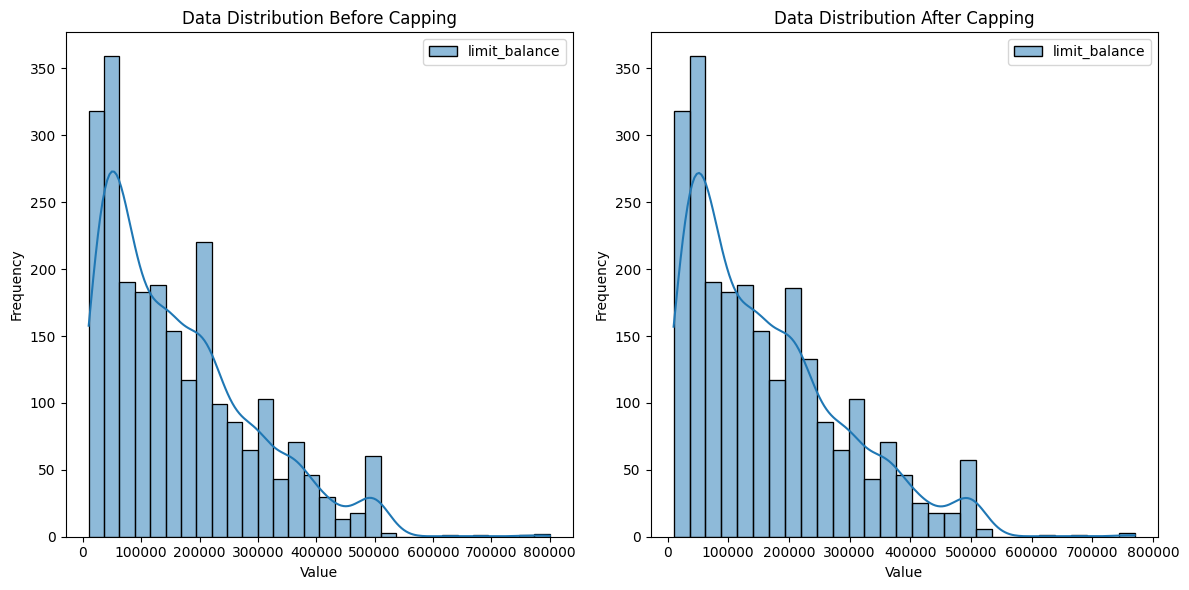

In [51]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data distribution before capping
sns.histplot(X_train_num, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Data Distribution Before Capping')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Plot data distribution after capping
sns.histplot(X_train_capped, kde=True, color='green', ax=axes[1])
axes[1].set_title('Data Distribution After Capping')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Menampilkan 2 plot sebelum dan setelah dilakukan capping. Terlihat perbedaan bahwa plot sisi kanan lebih landai dibandingkan plot kiri

### 2. X_test_num

Membagi handling outlier menjadi 2, yaitu X_train_num dan X_test_num

#### i. Calculate lower boundary & upper boundary X_test_num

Batas bawah dan batas atas dapat membantu model mengukur toleransi terhadap outlier atau anomali data

In [52]:
# Check skewness for X_train_num
X_test_num.skew()

limit_balance    0.905664
dtype: float64

Karena skewness masih dibawah 1, maka distribusi data masih dianggap normal, namun perlu dipastikan apakah ada outlier atau tidak.

In [53]:
# Calculates the first quartile (Q1) and third quartile (Q3) of X_test_num
Q1 = np.percentile(X_test_num, 25)
Q3 = np.percentile(X_test_num, 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Calculate lower and upper boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show result
print(f'Ambang batas bawah X_test_num adalah :', lower_bound)
print(f'Ambang batas atas X_test_num adalah :', upper_bound)

Ambang batas bawah X_test_num adalah : -220000.0
Ambang batas atas X_test_num adalah : 500000.0


Menghitung batas bawah yaitu -22.000 dan batas atas 55.000 dari variabel X_test_num

In [54]:
# Count amount of outlier
outlier_count = np.sum((X_test_num < lower_bound) | (X_test_num > upper_bound))

# Calculate the total data in a column
total_data = len(X_test_num)

# Show amount of outlier
print(f"Jumlah outlier dalam data X train adalah: {outlier_count['limit_balance']} outlier")

Jumlah outlier dalam data X train adalah: 3 outlier


Ternyata ada 3 outlier yang perlu dihandling agar distribusi data lebih baik

#### ii. Capping Method X_test_num

Metode Capping (Capping Method) digunakan untuk mengatasi outlier dalam sebuah dataset dengan cara mengubah nilai-nilai outlier menjadi nilai-nilai yang lebih mendekati nilai-nilai batas atas (upper bound) atau batas bawah (lower bound) yang telah ditentukan sebelumnya.

In [55]:
# Apply the Winsorizer technique
capping_test = Winsorizer(capping_method='iqr', 
                         tail='both', fold=3, variables=['limit_balance'])

Saya menggunakan metode iqr dan fold 3 karena ada skewness yaitu 0.9. Serta saya menggunakan tail both agar outlier dicapping atau dimasukkan ke lower bound dan upper bound

In [56]:
# Apply the Winsorizer transformation to the data test
X_test_capped = capping_test.fit_transform(X_test_num)

# Show result
X_test_capped

,limit_balance
899,180000.0
2292,200000.0
443,310000.0
2618,80000.0
2696,210000.0
...,...
1969,240000.0
574,240000.0
41,30000.0
603,110000.0


Menampilkan dataframe X_test_capped yang merupakan X_test_num setelah dicapping. Terlihat bahwa jumlah baris masih sama dengan sebelum di capping

#### iii. Plot X_test_num after capping

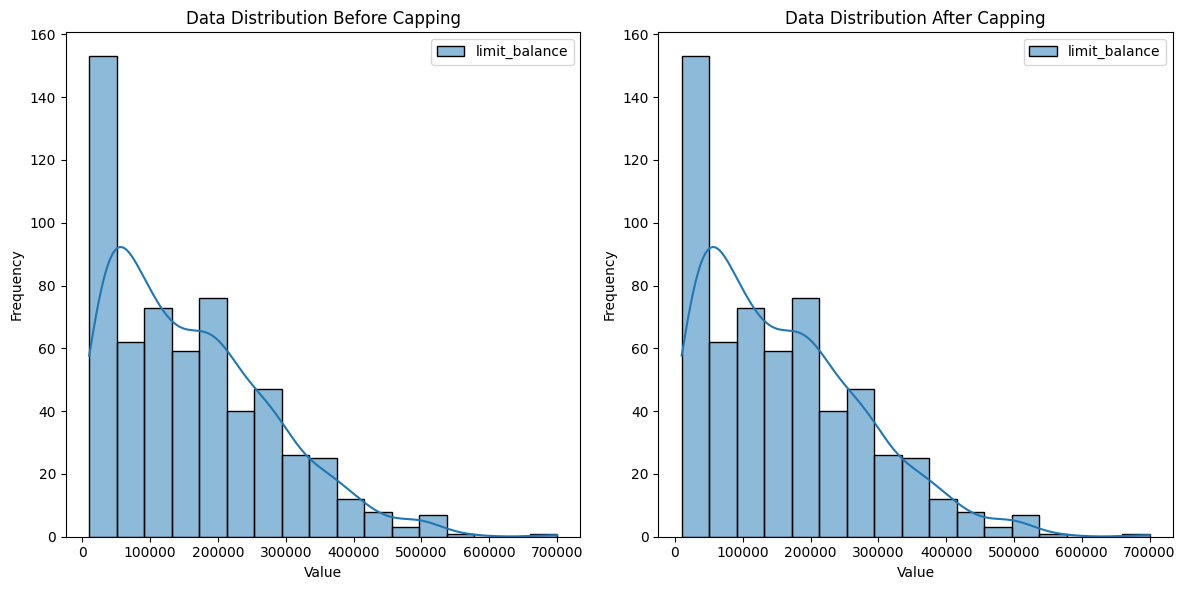

In [57]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data distribution before capping
sns.histplot(X_test_num, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Data Distribution Before Capping')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Plot data distribution after capping
sns.histplot(X_test_capped, kde=True, color='green', ax=axes[1])
axes[1].set_title('Data Distribution After Capping')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Menampilkan 2 plot sebelum dan setelah dilakukan capping. Terlihat perbedaan bahwa plot sisi kanan lebih landai dibandingkan plot kiri

## H. Feature Scaling

Langkah ini merupakan proses mengubah rentang nilai dari fitur-fitur dalam dataset sehingga mereka memiliki skala yang serupa atau terstandarisasi.

### 1. X_train_num

In [58]:
# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Fitting dan transforming pada data training numerik
X_train_scaled = scaler.fit_transform(X_train_capped)

# Convert the result of the transformation to a DataFrame with the appropriate column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_train_scaled.reset_index(drop=True, inplace=True)

Membuat inisialisasi untuk minmaxscaler dan melakukan .fit.transform untuk X_train_num dan .transform untuk X_test_num. Saya memilih minmax karena menurut saya minmaxscaler cocok untuk membuat ulang skala untuk variabel X_train_num dan X_test_num .

In [59]:
# Show dataframe
X_train_scaled

,limit_balance
0,0.052632
1,0.250000
2,0.013158
3,0.289474
4,0.131579
...,...
2366,0.447368
2367,0.144737
2368,0.065789
2369,0.052632


Menampilkan dataframe hasil scaling untuk X_train_num

### 2. X_test_num

In [60]:
# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Fitting dan transforming pada data test numeric
X_test_scaled = scaler.fit_transform(X_test_capped)

# Convert the result of the transformation to a dataframe with the appropriate column names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)
X_test_scaled.reset_index(drop=True, inplace=True)

Membuat inisialisasi untuk minmaxscaler dan melakukan .fit.transform untuk X_train_num dan .transform untuk X_test_num. Saya memilih minmax karena menurut saya minmaxscaler cocok untuk membuat ulang skala untuk variabel X_train_num dan X_test_num .

In [61]:
# Show dataframe
X_test_scaled

,limit_balance
0,0.246377
1,0.275362
2,0.434783
3,0.101449
4,0.289855
...,...
588,0.333333
589,0.333333
590,0.028986
591,0.144928


Menampilkan dataframe hasil scaling untuk X_test_num

## I. Feature Encoding

Encoding tidak perlu dilakukan karena categorical column sudah berbentuk numeric/integer, jadi tidak perlu untuk diskala ulang

## J. Concatenate Column

Langkah ini dilakukan untuk menggabungkan dua atau lebih kolom atau beberapa dataframe menjadi satu.

In [62]:
# Concatenate X_train_scaled and X_train_cat
X_train_concat = np.concatenate([X_train_scaled, X_train_cat], axis=1)

# Concatenate X_test_scaled and X_test_cat
X_test_concat = np.concatenate([X_test_scaled, X_test_cat], axis=1)

Menggabungkan dataframe X_train_scaled dan X_train_cat menjadi X_train_concat.

Menggabungkan dataframe X_test_scaled dan X_test_cat menjadi X_test_concat.

## K. Imbalance Handling

Imbalance Handling adalah proses mengatasi ketidakseimbangan dalam distribusi kelas dalam dataset. Ketidakseimbangan terjadi ketika satu kelas dalam dataset memiliki jumlah sampel yang jauh lebih banyak atau lebih sedikit daripada kelas lainnya.

In [63]:
# Displaying values before SMOTE
print("Jumlah kelas sebelum SMOTE:")
print(y_train.value_counts())

Jumlah kelas sebelum SMOTE:
default_payment_next_month
0                             1863
1                              508
dtype: int64


Terlihat jelas bahwa adanya ketidakseimbangan distribusi antara kelas 0 dan 1. Perbedaan 1:3, hal ini harus dihandling dengan cara SMOTENC over-sampling

In [64]:
# Applying SMOTE using SMOTENC with specified categorical features
smotenc = SMOTENC([1,2,3,4,5,6], random_state=66)

# Resampling the dataset using SMOTE
X_train_final, y_train_final = smotenc.fit_resample(X_train_concat, y_train)

# Displaying class distribution after SMOTE
print("Jumlah kelas setelah SMOTE:")
print(y_train_final.value_counts())


Jumlah kelas setelah SMOTE:
default_payment_next_month
0                             1863
1                             1863
dtype: int64


Jumlah data untuk kelas 0 dan 1 sudah sama yaitu 1863 data

# **vii. Model Definition**

Bagian ini berisi cell untuk mendefinisikan model.

## 1. Initialization Default Model

Pada langkah ini dilakukan pemanggilan model

### Logistic Regression

In [65]:
# Creating a Logistic Regression default model
logreg_model = LogisticRegression()

# Fitting the model to the training data
logreg_model.fit(X_train_final, y_train_final)


LogisticRegression()

Saya menggunakan Logistic Regression karena model ini digunakan untuk probabilitas biner (0 atau 1). Dalam kasus ini, model Logistic Regression cocok karena hanya ada 2 output prediksi yaitu bisa bayar / gagal bayar

### KNN

In [66]:
# Creating a KNN default model
knn_model = KNeighborsClassifier(n_neighbors=7)

# Fitting the model to the training data
knn_model.fit(X_train_final, y_train_final)

KNeighborsClassifier(n_neighbors=7)

Saya menggunakan KNN karena model KNN adalah model yang mudah dipahami dan diimplementasikan untuk klasifikasi

### SVM

In [67]:
# Creating a SVM default model
svm_model = SVC()

# Fitting the model to the training data
svm_model.fit(X_train_final, y_train_final)

SVC()

Saya menggunakan model SVM karena model ini dapat bekerja dengan baik dalam ruang yang berdimensi tinggi, artinya model ini baik digunakan untuk data yang mempunyai banyak kolom dan baris

## 2. Classification Report

Setelah inisialisasi, saya ingin melihat laporan klasifikasi setiap model terhadap data test dan menseleksi model mana yang paling baik untuk digunakan nantinya untuk memprediksi data

### Logistic Regression

In [68]:
# Predicting the target labels for the train data using the Logistic Regression default model
y_train_logreg_predict =logreg_model.predict(X_train_final)

# Predicting the target labels for the test data using the Logistic Regression default model
y_test_logreg_predict =logreg_model.predict(X_test_concat)

# Displaying the classification report for Logistic Regression default model on the train data
print('----------Classification Report for Logistic Regression X train-------------')
print(classification_report(y_train_final,y_train_logreg_predict))

# Displaying the classification report for Logistic Regression default model on the test data
print('----------Classification Report for Logistic Regression X test-------------')
print(classification_report(y_test,y_test_logreg_predict))

----------Classification Report for Logistic Regression X train-------------
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1863
           1       0.69      0.68      0.68      1863

    accuracy                           0.69      3726
   macro avg       0.69      0.69      0.69      3726
weighted avg       0.69      0.69      0.69      3726

----------Classification Report for Logistic Regression X test-------------
              precision    recall  f1-score   support

           0       0.89      0.69      0.77       466
           1       0.37      0.69      0.48       127

    accuracy                           0.69       593
   macro avg       0.63      0.69      0.63       593
weighted avg       0.78      0.69      0.71       593



Classification report untuk Logistic Regression X_train adalah pada kelas 1 : precision 69%%, recall 68%, f1-score 68% dan accuracy 69%.

Classification report untuk Logistic Regression X_test adalah pada kelas 1 : precision 37%%, recall 69%, f1-score 48% dan accuracy 69%.

### KNN

In [69]:
# Predicting the target labels for the train data using the KNN default model
y_train_knn_predict =knn_model.predict(X_train_final)

# Predicting the target labels for the test data using the KNN default model
y_test_knn_predict =knn_model.predict(X_test_concat)

# Displaying the classification report for KNN default model on the train data
print('----------Classification Report for KNN X train-------------')
print(classification_report(y_train_final,y_train_knn_predict))

# Displaying the classification report for KNN default model on the test data
print('----------Classification Report for KNN X test-------------')
print(classification_report(y_test,y_test_knn_predict))

----------Classification Report for KNN X train-------------
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1863
           1       0.85      0.72      0.78      1863

    accuracy                           0.80      3726
   macro avg       0.81      0.80      0.80      3726
weighted avg       0.81      0.80      0.80      3726

----------Classification Report for KNN X test-------------
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       466
           1       0.41      0.61      0.49       127

    accuracy                           0.73       593
   macro avg       0.64      0.68      0.65       593
weighted avg       0.78      0.73      0.74       593



Classification report untuk Logistic Regression X_train adalah pada kelas 1 : precision 85%%, recall 72%, f1-score 78% dan accuracy 80%.

Classification report untuk Logistic Regression X_test adalah pada kelas 1 : precision 41%%, recall 61%, f1-score 49% dan accuracy 73%.

### SVM

In [70]:
# Predicting the target labels for the train data using the svm default model
y_train_svm_predict =svm_model.predict(X_train_final)

# Predicting the target labels for the test data using the svm default model
y_test_svm_predict =svm_model.predict(X_test_concat)

# Displaying the classification report for svm default model on the train data
print('----------Classification Report for svm X train-------------')
print(classification_report(y_train_final,y_train_svm_predict))

# Displaying the classification report for svm default model on the test data
print('----------Classification Report for svm X test-------------')
print(classification_report(y_test,y_test_svm_predict))

----------Classification Report for svm X train-------------
              precision    recall  f1-score   support

           0       0.68      0.87      0.77      1863
           1       0.82      0.59      0.69      1863

    accuracy                           0.73      3726
   macro avg       0.75      0.73      0.73      3726
weighted avg       0.75      0.73      0.73      3726

----------Classification Report for svm X test-------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       466
           1       0.45      0.61      0.52       127

    accuracy                           0.76       593
   macro avg       0.67      0.70      0.68       593
weighted avg       0.79      0.76      0.77       593



Classification report untuk Logistic Regression X_train adalah pada kelas 1 : precision 82%%, recall 59%, f1-score 69% dan accuracy 73%.

Classification report untuk Logistic Regression X_test adalah pada kelas 1 : precision 45%%, recall 61%, f1-score 52% dan accuracy 76%.

Berdasarkan nilai accuracy pada classification report, ditemukan bahwa model SVM adalah model terbaik sejauh ini untuk pengujian hasil klasifikasi terhadap data test. Namun akan dilakukan pengujian cross-validation untuk memastikan apakah model SVM adalah model yang paling baik untuk memprediksi data.

## 3. Cross Validation

Dilakukan pengujian lebih lanjut menggunakan teknik Cross Validation untuk memastikan model mana yang terbaik untuk dipakai memprediksi data nantinya.

### Logistic Regression

In [71]:
# Performing cross-validation with Logistic Regression default model
log_reg_cross_val = cross_val_score(logreg_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=7,
                                     scoring="f1")

# Printing F1 score results from cross-validation
print('F1 Score - All - Cross Validation  : ', log_reg_cross_val)
print('F1 Score - Mean - Cross Validation : ', log_reg_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', log_reg_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (log_reg_cross_val.mean()-log_reg_cross_val.std()) , '-', (log_reg_cross_val.mean()+log_reg_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.69565217 0.67052023 0.66915888 0.66666667 0.71455577 0.66537718
 0.68518519]
F1 Score - Mean - Cross Validation :  0.681016582442054
F1 Score - Std - Cross Validation  :  0.017145362725996996
F1 Score - Range of Test-Set       :  0.663871219716057 - 0.698161945168051


Saya menggunakan parameter CV=7 untuk membuat 7 partisi dalam proses Cross-Validation nya serta scoring menggunakan f1 score karena menurut saya kelas 0 dan 1 sama-sama penting jadi harus diminimalisir False Negative(FN) dan False Positive(FP) nya. Untuk hasil range test nya berkisar antara 0.66-0.69 atau 66% sampai 69%, yang bisa dikatakan bahwa model ini memiliki akurasi 66-69% dalam memprediksi data baru

Mean CV = 0.6 mendekati angka 1, artinya model ini cukup optimal untuk digunakan. Sedangkan standar deviasi 0.01 menandakan model ini bisa dikatakan best fit atau tidak mengalami over fitting

### KNN

In [72]:
# Performing cross-validation with KNN default model
knn_cross_val = cross_val_score(knn_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=7,
                                     scoring="f1")

# Printing F1 score results from cross-validation
print('F1 Score - All - Cross Validation  : ', knn_cross_val)
print('F1 Score - Mean - Cross Validation : ', knn_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', knn_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (knn_cross_val.mean()-knn_cross_val.std()) , '-', (knn_cross_val.mean()+knn_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.70020964 0.66805846 0.72244898 0.7611336  0.78612717 0.75944334
 0.74319066]
F1 Score - Mean - Cross Validation :  0.7343731215171845
F1 Score - Std - Cross Validation  :  0.03743152395373397
F1 Score - Range of Test-Set       :  0.6969415975634505 - 0.7718046454709184


Saya menggunakan parameter CV=7 untuk membuat 7 partisi dalam proses Cross-Validation nya serta scoring menggunakan f1 score karena menurut saya kelas 0 dan 1 sama-sama penting jadi harus diminimalisir False Negative(FN) dan False Positive(FP) nya. Untuk hasil range test nya berkisar antara 0.69-0.77 atau 69% sampai 77%.

Mean CV = 0.7 mendekati angka 1, artinya model ini cukup optimal untuk digunakan. Sedangkan standar deviasi 0.03 menandakan model ini bisa dikatakan best fit atau tidak mengalami over fitting

### SVM

In [73]:
# Performing cross-validation with SVM default model
svm_cross_val = cross_val_score(svm_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=7,
                                     scoring="f1")

# Printing F1 score results from cross-validation
print('F1 Score - All - Cross Validation  : ', svm_cross_val)
print('F1 Score - Mean - Cross Validation : ', svm_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', svm_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (svm_cross_val.mean()-svm_cross_val.std()) , '-', (svm_cross_val.mean()+svm_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68831169 0.62211982 0.65938865 0.69213483 0.70353982 0.68803419
 0.68376068]
F1 Score - Mean - Cross Validation :  0.6767556680760709
F1 Score - Std - Cross Validation  :  0.0254962638631655
F1 Score - Range of Test-Set       :  0.6512594042129054 - 0.7022519319392364


Saya menggunakan parameter CV=7 untuk membuat 7 partisi dalam proses Cross-Validation nya serta scoring menggunakan f1 score karena menurut saya kelas 0 dan 1 sama-sama penting jadi harus diminimalisir False Negative(FN) dan False Positive(FP) nya. Untuk hasil range test nya berkisar antara 0.65-0.70 atau 65% sampai 70%.

Mean CV = 0.6 mendekati angka 1, artinya model ini cukup optimal untuk digunakan. Sedangkan standar deviasi 0.02 menandakan model ini bisa dikatakan best fit atau tidak mengalami over fitting

Hasil Analisa : Berdasarkan Cross-Validation yang telah dilakukan, ternyata model KNN adalah model terbaik yang bisa digunakan untuk memprediksi data. Sebelumnya pada classification report, model SVM adalah model terbaik, namun setelah diuji dengan teknik Cross-Validation, model KNN lah yang terpilih untuk memprediksi data.

Semua model sebenarnya optimal untuk digunakan karena nilai mean mendekati 1 dan tidak over fitting karena standar deviasi bernilai 0. Namun karena harus menseleksi model, saya memilih KNN untuk digunakan karena teruji dalam cross-validation dan efisiensi waktu dibanding kedua model lainnya.

# **viii. Model Training**

Pada bagian ini berisi code untuk melatih model melalui beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan.

## Hyper Parameter Tuning

Hyperparameter tuning adalah proses mencari dan memilih kombinasi terbaik dari hyperparameter untuk model machine learning guna meningkatkan kinerja model pada data uji.

Saya memilih metode RandomizedSearchCV karena RandomizedSearchCV punya keunggulan dalam hal efisiensi waktu dibandingkan metode GridSearchCV. Selain itu, RandomizedSearch tidak bergantung pada urutan data, sehingga pemrosesan beberapa data dapat berjalan secara paralel atau bersamaan

In [74]:
# Define randomized search parameter
randomized_search_parameter = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}


Saya mencoba beberapa parameter yaitu:
1. n_neighbors : Parameter yang mengontrol jumlah tetangga terdekat yang akan digunakan untuk membuat prediksi.
2. weights : Parameter ini mengontrol jenis bobot yang akan diberikan kepada tetangga saat membuat prediksi.
3. p: Ini adalah parameter yang mengontrol jenis jarak yang digunakan dalam perhitungan jarak antara titik-titik data.
4. algorithm: Parameter ini mengontrol algoritma yang digunakan untuk mencari tetangga terdekat.

Parameter weights : 
1. uniform: Memberikan bobot yang sama untuk semua tetangga, artinya semua tetangga memiliki pengaruh yang sama terhadap prediksi.
2. distance: Memberikan bobot yang lebih tinggi kepada tetangga yang lebih dekat dengan titik yang diprediksi.

Parameter p : 
1. 1 : Menggunakan jarak Manhattan (L1 distance).
2. 2 : Menggunakan jarak Euclidean (L2 distance).

Parameter algorithm : 
1. auto : Algoritma yang dipilih secara otomatis berdasarkan tipe data dan parameter input.
2. ball_tree : Menggunakan struktur pohon bola untuk pencarian tetangga terdekat.
3. kd_tree : Menggunakan struktur pohon KD untuk pencarian tetangga terdekat.
4. brute : Mencari tetangga terdekat dengan metode brute force, yaitu dengan membandingkan setiap titik dengan semua titik lainnya.

In [75]:
#Run hyperparameter tuning using the randomized searchCV method
knn_tuning_model = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                 param_distributions=randomized_search_parameter,
                                 n_iter=150,
                                 cv=7,
                                 random_state=3,
                                 n_jobs=-1,
                                 scoring='f1')

Saya mencoba beberapa hyperparameter yaitu:
1. estimator=KNeighborsClassifier(): Menggunakan KNeighborsClassifier() sebagai model yang akan dituning hyperparameter-nya.
2. param_distributions=randomized_search_parameter: Menggunakan kamus randomized_search_parameter yang berisi daftar hyperparameter dan nilai-nilai yang akan dicoba dalam pencarian acak.
3. n_iter=150: Akan mencoba 150 kombinasi acak dari hyperparameter.
4. cv=7: Melakukan validasi silang dengan 7 lipatan untuk mengevaluasi kinerja model.
5. random_state=3: Mengatur angka acak yang sama (seed) ke 3 untuk memastikan hasil yang konsisten ketika kode dijalankan ulang.
6. n_jobs=-1: Menggunakan semua inti CPU yang tersedia untuk pemrosesan paralel, jika memungkinkan, untuk percepatan.
7. scoring='f1': Menggunakan metrik evaluasi 'f1' (F1-score) untuk mengukur kinerja model selama pencarian parameter acak.

In [76]:
# Fit KNN tuning model to data train
knn_tuning_model.fit(X_train_final, y_train_final)

/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected

RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=3, scoring='f1')

Melakukan pelatihan terhadap variabel knn_tuning_model

In [77]:
# Printing the mean value of cross-validated test scores from the KNN tuning model
print(f"Nilai mean dari KNN tuning model adalah:", knn_tuning_model.cv_results_['mean_test_score'].mean())

# Printing the standard deviation of cross-validated test scores from the KNN tuning model
print(f"Nilai standar deviasi dari KNN tuning model adalah:", knn_tuning_model.cv_results_['mean_test_score'].std())


Nilai mean dari KNN tuning model adalah: 0.7459713125785865
Nilai standar deviasi dari KNN tuning model adalah: 0.010509356816899396


Mean 0.74 menandakan bahwa model KNN setelah dilakukan tuning masih memiliki kinerja yang optimal untuk memprediksi data. Sedangkan standar deviasi 0.01 menandakan model ini konsisten di seluruh lipatan cross-validation

In [78]:
# Accessing the best estimator for knn tuning model
knn_tuning_best_estimator = knn_tuning_model.best_estimator_

# Accessing the best hyperparameter combination for knn tuning model
knn_tuning_best_parameters = knn_tuning_model.best_params_


F1 Score - Train Set  :  0.9033927544565842 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1863
           1       0.97      0.84      0.90      1863

    accuracy                           0.91      3726
   macro avg       0.92      0.91      0.91      3726
weighted avg       0.92      0.91      0.91      3726
 

Confusion Matrix      : 


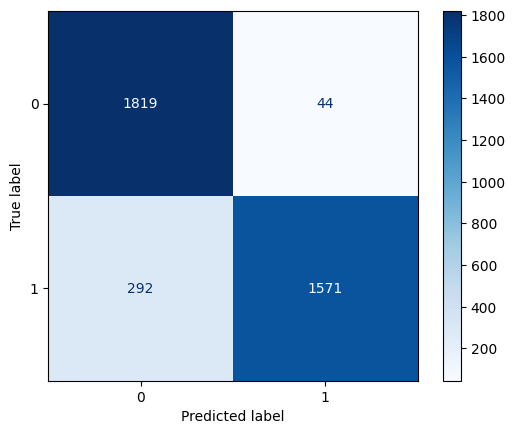

In [79]:
# Make predictions on the train data using the best-tuned model
y_pred_train_tuning = knn_tuning_best_estimator.predict(X_train_final)

# Calculate and print the F1 Score on the train set
print('F1 Score - Train Set  : ', f1_score(y_train_final, y_pred_train_tuning), '\n')

# Generate and print the classification report on the train set
print('Classification Report : \n', classification_report(y_train_final, y_pred_train_tuning), '\n')

# Display the confusion matrix using ConfusionMatrixDisplay
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_tuning_model, X_train_final, y_train_final, cmap='Blues'))

Pada train set, nilai F1-score mencapai 90% serta akurasi 91%. Ini menandakan hal yang baik untuk hasi pengujiannya. Untuk hasil precision 97% dan recall 84%. Angka-angka tersebut menandakan bahwa model ini sangat baik dalam data pelatihan. Hal ini dibuktikan pada confusion matrix, data pada False Negative (FN) dan False Positive (FP) yang sedikit dibandingkan prediksi data pada kelas True Positive(TP) dan True Negative(TN) Saya memilih F1-score karena menurut saya kelas TP dan TN sama-sama penting dan kelas FP dan FN harus diminimalisir.

F1 Score - Test Set  :  0.4514285714285714 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77       466
           1       0.35      0.62      0.45       127

    accuracy                           0.68       593
   macro avg       0.61      0.66      0.61       593
weighted avg       0.76      0.68      0.70       593
 

Confusion Matrix      : 


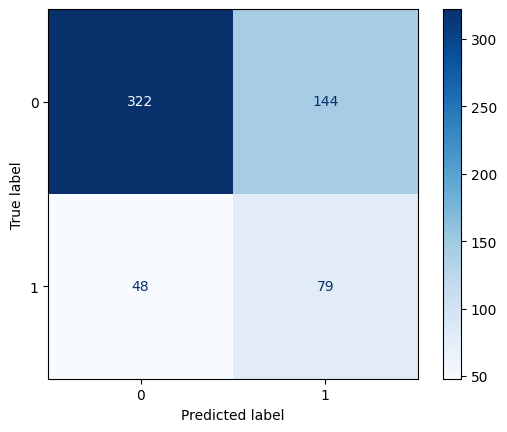

In [80]:
# Make predictions on the test data using the best-tuned model
y_pred_test_tuning = knn_tuning_best_estimator.predict(X_test_concat)

# Calculate and print the F1 Score on the test set
print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_tuning), '\n')

# Generate and print the classification report on the test set
print('Classification Report : \n', classification_report(y_test, y_pred_test_tuning), '\n')

# Display the confusion matrix using ConfusionMatrixDisplay
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_tuning_model, X_test_concat, y_test, cmap='Blues'))


Pada test set, KNN setelah di tuning memiliki hasil yang kurang baik pada F1 score yaitu 45% dan accuracy 68%. Hal ini juga dibuktikan pada confusion matrix, 1 untuk kelas True Positive (TP) berisi 79 data, 0 untuk kelas True Negative (TN) berisi 322 data, False Positive (FP) berisi 48 data dan False Negative (FN) berisi 144 data. Kelas FN dan FP masih tinggi untuk test set dan ini mengkhawatirkan apabila model ini dipakai untuk memprediksi data yang belum pernah dilihat karena berpotensi salah prediksi. Karena itu, saya akan melakukan model evaluation untuk membandingkan performa antara KNN default model atau KNN sebelum tuning dengan KNN tuning model atau KNN setelah di tuning

Saya memilih F1-score karena menurut saya kelas TP dan TN sama-sama penting dan kelas FP dan FN harus diminimalisir.

# **ix. Model Evaluation**

Pada bagian ini, dilakukan evaluasi model untuk menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. 

In [81]:
# Create an empty dictionary to store performance reports
all_reports = {}

# Define a function to generate and store performance metrics in the dictionary
def performance_report(all_reports, y_test, y_test_knn_predict, name):
  score_reports = {
      'test - precision': precision_score(y_test, y_test_knn_predict),
      'test - recall': recall_score(y_test, y_test_knn_predict),
      'test - accuracy_score': accuracy_score(y_test, y_test_knn_predict),
      'test - f1_score': f1_score(y_test, y_test_knn_predict),
  }
  # Store the performance metrics in the dictionary
  all_reports[name] = score_reports
  return all_reports

# Generate and store the performance metrics for the baseline (default hyperparameter) model
all_reports = performance_report(all_reports, y_test, y_test_knn_predict, 'KNN Default Model')

# Create a dataframe to display the performance metrics
pd.DataFrame(all_reports)

,KNN Default Model
test - accuracy_score,0.726813
test - f1_score,0.487342
test - precision,0.407407
test - recall,0.606299


Pada tabel diatas menunjukkan performa KNN default model atau sebelum dilakukan hyperparameter tuning. Terlihat bahwa accuracy score 72%, F1-score 48%, precision 40% dan recall 60%. Untuk selanjutnya, saya akan melakukan perbandingan dengan model KNN setelah dilakukan hyperparameter tuning.

In [82]:
#Displays a comparison table of values from the default f1 test and the random search method
all_reports = performance_report(all_reports, y_test, y_pred_test_tuning, 'KNN Tuning Model')
pd.DataFrame(all_reports)

,KNN Default Model,KNN Tuning Model
test - precision,0.407407,0.354260
test - recall,0.606299,0.622047
test - accuracy_score,0.726813,0.676223
test - f1_score,0.487342,0.451429


Berdasarkan tabel diatas, terlihat bahwa KNN default model memiliki score accuracy dan F1 yang lebih tinggi yaitu 72% dan 48% dibandingkan KNN Tuning Model yang memiliki score 67% untuk accuracy dan 45% untuk F1 Score.

# **x. Model Saving**

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [83]:
# Save the scaler object to a file using pickle
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

# Save the KNN default model to a file using pickle
with open('knn_model.pkl', 'wb') as file_2:
  pickle.dump(knn_model, file_2)